In [ ]:
import re
import numpy as np
import pandas as pd
import nltk
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')

from textblob import TextBlob

from sklearn.feature_extraction.text import CountVectorizer

from sklearn.model_selection import train_test_split

from sklearn.linear_model import LogisticRegression

from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, ConfusionMatrixDisplay

from sklearn.model_selection import GridSearchCV

import seaborn as sns
from wordcloud import WordCloud
import matplotlib.pyplot as plt

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


**CFG and Parse tree**

---



In [ ]:
import nltk
from nltk import CFG, ChartParser
nltk.download('punkt')

grammar = CFG.fromstring("""
    S -> NP VP
    NP -> Det N | Det N PP
    VP -> V NP
    PP -> P NP
    Det -> 'the' | 'a'
    N -> 'dog' | 'man' | 'park'
    V -> 'saw'
    P -> 'in'
""")

#parser with the defined CFG
parser = ChartParser(grammar)

sentence = "the dog saw a man in the park"

tokens = nltk.word_tokenize(sentence)

for tree in parser.parse(tokens):
    print(tree)

    # Visualize the parse tree
    tree.pretty_print()

(S
  (NP (Det the) (N dog))
  (VP
    (V saw)
    (NP (Det a) (N man) (PP (P in) (NP (Det the) (N park))))))
                 S                      
      ___________|___                    
     |               VP                 
     |        _______|___                
     |       |           NP             
     |       |    _______|___            
     |       |   |   |       PP         
     |       |   |   |    ___|___        
     NP      |   |   |   |       NP     
  ___|___    |   |   |   |    ___|___    
Det      N   V  Det  N   P  Det      N  
 |       |   |   |   |   |   |       |   
the     dog saw  a  man  in the     park



[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


**Pos Tagging**

In [ ]:
nltk.download('averaged_perceptron_tagger')

title = TextBlob("The dogs are barking in the park")
tags = title.tags
for word, pos in tags:
  print(f"Word: {word}, POS Tag: {pos}")

Word: The, POS Tag: DT
Word: dogs, POS Tag: NNS
Word: are, POS Tag: VBP
Word: barking, POS Tag: VBG
Word: in, POS Tag: IN
Word: the, POS Tag: DT
Word: park, POS Tag: NN


[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


**Dependecy Tree**

In [ ]:
import spacy
from spacy import displacy

nlp = spacy.load("en_core_web_sm")
# about_interest_doc = nlp("Sentiment analysis of Twitter dataset of 2020")
about_interest_doc = nlp("Emma is working on a project since the morning")
options = {"compact": True, "bg": "#09a3d5",
           "color": "white", "font": "Source Sans Pro"}
displacy.render(about_interest_doc, jupyter=True, style="dep", options={'distance': 140})
print("*************************************************")
print("Named Entity Recognition")
displacy.render(about_interest_doc, jupyter=True, style="ent")

*************************************************
Named Entity Recognition


# Load Dataset from Google drive

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# change the directory to big-data-colab folder
%cd /content/drive/My Drive/Colab Notebooks/TOC_Grammar

#pwd
!ls

/content/drive/My Drive/Colab Notebooks/TOC_Grammar
 dataset.csv		     vaccination_tweets.gsheet
 TOC-Project-Grammar.ipynb  'vaccination_tweets - vaccination_tweets.csv'
 vaccination_tweets.csv      vaccine_tweets.csv


In [ ]:
df = pd.read_csv('/content/drive/My Drive/Colab Notebooks/TOC_Grammar/vaccine_tweets.csv')
df.head(10)


,user_name,user_location,user_description,user_created,user_followers,user_friends,user_favourites,user_verified,date,text,hashtags,source,is_retweet
0,MyNewsNE,Assam,MyNewsNE a dedicated multi-lingual media house...,5/24/20 10:18,64,11,110,False,8/18/20 12:55,Australia to Manufactur Covid-19 Vacine and gi...,['CovidVaccine'],Twitter Web App,False
1,Shubham Gupta,NaN,I will tell about all experiences of my life f...,8/14/20 16:42,1,17,0,False,8/18/20 12:55,#CoronavirusVaccine #CoronaVaccine #CovidVacci...,"['CoronavirusVaccine', 'CoronaVaccine', 'Covid...",Twitter for Android,False
2,Journal of Infectiology,NaN,Journal of Infectiology (ISSN 2689-9981) is ac...,12/14/17 7:07,143,566,8,False,8/18/20 12:46,Deaths due to COVID-19 in Affected Countries\n...,NaN,Twitter Web App,False
3,Zane,NaN,Fresher than you.,9/18/19 11:01,29,25,620,False,8/18/20 12:45,@Team_Subhashree @subhashreesotwe @iamrajchoco...,NaN,Twitter for Android,False
4,Ann-Maree O’Connor,"Adelaide, South Australia",Retired university administrator. Melburnian b...,1/24/13 14:53,83,497,10737,False,8/18/20 12:45,@michellegrattan @ConversationEDU This is what...,NaN,Twitter Web App,False
5,Raunak Scherbatsky DankWorth,NaN,Neuro surgeon + Diagnostician.👨‍⚕️\na good phy...,8/3/20 13:39,3,27,918,False,8/18/20 12:44,The Multi-system Inflammatory Syndrome-Childre...,"['COVID19', 'COVID19India']",Twitter for Android,False
6,Rajesh Tadepalli,"Hyderabad, India",Growth Initiatives @tech_mahindra | AIMer | Br...,5/7/13 3:57,918,2561,31837,False,8/18/20 12:34,@PrivilRodrigues @yatish57 @deepkaranahuja @sh...,NaN,Twitter for Android,False
7,AKisASocialisolationist wash yer damn hands,The Great Pacific Northwest,"Iconoclast, cat person, soccer fan, textile & ...",2/7/15 7:24,2321,3236,264351,False,8/18/20 12:30,"@MSNBC Well, let’s qualify that: would anyone ...",['CovidVaccine'],Twitter for iPhone,False
8,Dr. Joseph Santoro,"Washington, DC 20009","Neuro PhD, #Innovator, #Technologist, #Startup...",1/17/09 21:10,19091,20986,128119,False,8/18/20 12:15,"Most countries, without the ability to make #V...",['Vaccines'],Hootsuite Inc.,False
9,VUMC OAP,"Nashville, TN","Office of Advanced Practice, Vanderbilt Univer...",3/16/17 20:22,282,96,788,False,8/18/20 11:57,#DNA zooms up charts in 1st week; hear #vacci...,"['DNA', 'vaccines', 'pandemic', 'COVID19', 'Co...",Twitter Web App,False


In [ ]:
# size of data before Data cleaning

df.shape

(3426, 13)

# Data pre processing

In [ ]:
df = df.drop(['user_name', 'user_location', 'user_description', 'user_created',
       'user_followers', 'user_friends', 'user_favourites', 'user_verified',
       'date', 'hashtags', 'source',
       'is_retweet'],axis=1)
df.head()

,text
0,Australia to Manufactur Covid-19 Vacine and gi...
1,#CoronavirusVaccine #CoronaVaccine #CovidVacci...
2,Deaths due to COVID-19 in Affected Countries\n...
3,@Team_Subhashree @subhashreesotwe @iamrajchoco...
4,@michellegrattan @ConversationEDU This is what...


In [ ]:
from nltk.corpus import stopwords
nltk.download('stopwords')
stop_words = set(stopwords.words('english'))

def f_prepare_tweet(text):
    text = text.lower()
    # Removes @username
    text = re.sub(r'(@[A-Za-z0-9_]+)', '', text)
    # removes url
    text = re.sub("([^0-9A-Za-z \t])|(\w+:\/\/\S+)", "", text)
    # removes punctuation
    text = re.sub(r'[^\w\s]', '', text)
    #Tokenization and remove stopwords
    blob = TextBlob(text)
    filtered_words = [word for word in blob.words if not word.lower() in stop_words]

    return " ".join(filtered_words)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [ ]:
df.text = df["text"].apply(f_prepare_tweet)
df.head(12)

,text
0,australia manufactur covid19 vacine giv citize...
1,coronavirusvaccine coronavaccine covidvaccine ...
2,deaths due covid19 affected countriesread
3,stay safe di amp da
4,passes leadership country voucher something w
5,multisystem inflammatory syndromechildren misc...
6,
7,well lets qualify would anyone party get vacci...
8,countries without ability make vaccines locall...
9,dna zooms charts 1st week hear vaccines episod...


**Null value check**

In [ ]:
np.sum(df.isnull().any(axis=1))

0

**Duplicate value check**

In [ ]:
print(len(df.duplicated('text')))
df = df.drop_duplicates('text')
len(df)

3426


3196

**Spelling correction**

In [ ]:
tx = df.at[0, 'text']
print(tx)
t = TextBlob(tx)
t = t.correct()
print(t.correct())

australia manufactur covid19 vacine giv citizens free cos afp quotes prime ministercovidvaccine
australia manufacture covid19 vaccine give citizens free cos asp quotes prime ministercovidvaccine


**part-of-speech tagging**

In [ ]:
df['txt']=df['text']

In [ ]:
nltk.download('averaged_perceptron_tagger')
def f_pos(data):
    d = TextBlob(data)
    tags = d.tags
    return tags

df['txt'] = df['txt'].apply(lambda x: f_pos(x))
df['txt'].head(12)

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


0     [(australia, NNS), (manufactur, VBP), (covid19...
1     [(coronavirusvaccine, NN), (coronavaccine, NN)...
2     [(deaths, NNS), (due, JJ), (covid19, RB), (aff...
3     [(stay, NN), (safe, JJ), (di, NN), (amp, NN), ...
4     [(passes, NNS), (leadership, NN), (country, NN...
5     [(multisystem, NN), (inflammatory, JJ), (syndr...
6                                                    []
7     [(well, RB), (lets, VBZ), (qualify, VB), (woul...
8     [(countries, NNS), (without, IN), (ability, NN...
9     [(dna, NN), (zooms, NNS), (charts, NNS), (1st,...
10    [(biocon, NN), (executive, NN), (chairperson, ...
11    [(overcovid19millionares, NNS), (covid19, VBP)...
Name: txt, dtype: object

In [ ]:
nltk.download('wordnet')
from nltk.stem import PorterStemmer

stemmer = PorterStemmer()

[nltk_data] Downloading package wordnet to /root/nltk_data...


In [ ]:
for w in t.words:
  if(w == 'manufacture'):
    print("Definition of {} is: {}".format(w , w.definitions))
    print()
  elif w == 'quotes':
    print("Original word: ",w)
    print("Lemmatized Text: ", w.lemmatize('v'))
    print("stemming Text: ", stemmer.stem(w))

Definition of manufacture is: ['the organized action of making of goods and services for sale', 'the act of making something (a product) from raw materials', 'put together out of artificial or natural components or parts; ; ; He manufactured a popular cereal"', 'make up something artificial or untrue', 'produce naturally', 'create or produce in a mechanical way']

Original word:  quotes
Lemmatized Text:  quote
stemming Text:  quot


**Text Normalization : Stemming and Lemmatization**

---



Lemmatization

In [ ]:
def f_lemmatizer(data):
    d = TextBlob(data)
    text = [word.lemmatize() for word in d.words]
    return data

In [ ]:
df['text'] = df['text'].apply(lambda x: f_lemmatizer(x))
df['text'].head(5)

0    australia manufactur covid19 vacine giv citize...
1    coronavirusvaccine coronavaccine covidvaccine ...
2            deaths due covid19 affected countriesread
3                                  stay safe di amp da
4        passes leadership country voucher something w
Name: text, dtype: object

**Stemming**

---



In [ ]:
from nltk.stem import PorterStemmer

stemmer = PorterStemmer()
def f_stemming(data):
    text = [stemmer.stem(word) for word in data]
    return data

In [ ]:
df["text"] = df["text"].apply(lambda x: f_stemming(x))
df.head(5)

,text,txt
0,australia manufactur covid19 vacine giv citize...,"[(australia, NNS), (manufactur, VBP), (covid19..."
1,coronavirusvaccine coronavaccine covidvaccine ...,"[(coronavirusvaccine, NN), (coronavaccine, NN)..."
2,deaths due covid19 affected countriesread,"[(deaths, NNS), (due, JJ), (covid19, RB), (aff..."
3,stay safe di amp da,"[(stay, NN), (safe, JJ), (di, NN), (amp, NN), ..."
4,passes leadership country voucher something w,"[(passes, NNS), (leadership, NN), (country, NN..."


In [ ]:
# size of data after Data cleaning
df.shape

(3196, 2)

***Sentiment Analysis***

---



In [ ]:
def f_sentiment(text):
  semantic_obj = TextBlob(text)
  if semantic_obj.sentiment.polarity>0:
    return 'positive'
  elif semantic_obj.sentiment.polarity<0:
    return 'negative'
  else:
    return 'neutral'

In [ ]:
df["sentiment"] = df["text"].apply(f_sentiment)
df.head(10)

,text,txt,sentiment
0,australia manufactur covid19 vacine giv citize...,"[(australia, NNS), (manufactur, VBP), (covid19...",positive
1,coronavirusvaccine coronavaccine covidvaccine ...,"[(coronavirusvaccine, NN), (coronavaccine, NN)...",positive
2,deaths due covid19 affected countriesread,"[(deaths, NNS), (due, JJ), (covid19, RB), (aff...",negative
3,stay safe di amp da,"[(stay, NN), (safe, JJ), (di, NN), (amp, NN), ...",positive
4,passes leadership country voucher something w,"[(passes, NNS), (leadership, NN), (country, NN...",neutral
5,multisystem inflammatory syndromechildren misc...,"[(multisystem, NN), (inflammatory, JJ), (syndr...",neutral
6,,[],neutral
7,well lets qualify would anyone party get vacci...,"[(well, RB), (lets, VBZ), (qualify, VB), (woul...",negative
8,countries without ability make vaccines locall...,"[(countries, NNS), (without, IN), (ability, NN...",negative
9,dna zooms charts 1st week hear vaccines episod...,"[(dna, NN), (zooms, NNS), (charts, NNS), (1st,...",neutral


# Data Visualization

In [ ]:
df['sentiment'].value_counts()

positive    1462
neutral     1458
negative     276
Name: sentiment, dtype: int64

<Axes: xlabel='sentiment', ylabel='count'>

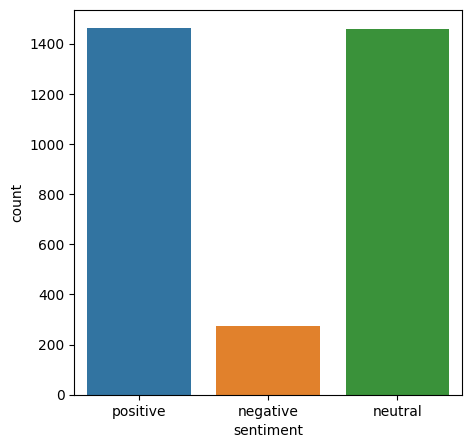

In [ ]:
fig = plt.figure(figsize=(5,5))
sns.countplot(x="sentiment",data=df)

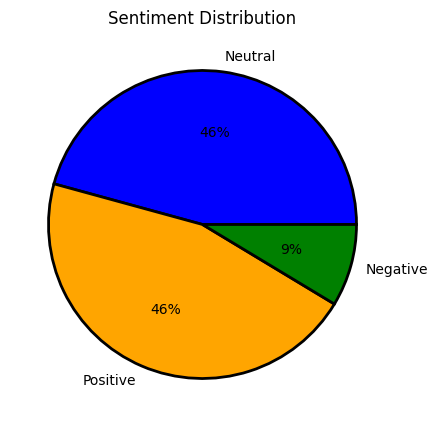

In [ ]:
plt.figure(figsize=(5,5))
wp = {'linewidth':2, 'edgecolor':"black"}
plt.pie(df['sentiment'].value_counts(), labels=['Neutral','Positive','Negative'],
        colors=('blue', 'orange', 'green'), autopct='%.0f%%', wedgeprops = wp)
plt.title('Sentiment Distribution')
plt.show()

In [ ]:
positive_tweets = df[df.sentiment == 'positive']
positive_tweets.count()

text         1462
txt          1462
sentiment    1462
dtype: int64

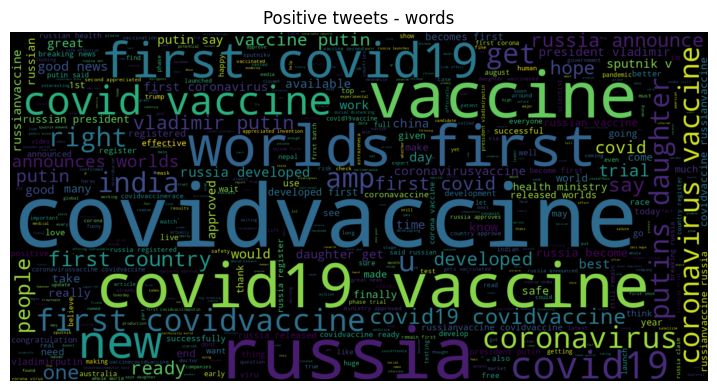

In [ ]:
text = ' '.join([word for word in positive_tweets['text']])
plt.figure(figsize=(9,9), facecolor='None')
wordcloud = WordCloud(stopwords=stop_words,max_words=500, width=1600, height=800).generate(text)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.title('Positive tweets - words')
plt.show()

In [ ]:
negative_tweets = df[df.sentiment == 'negative']
negative_tweets.count()

text         276
txt          276
sentiment    276
dtype: int64

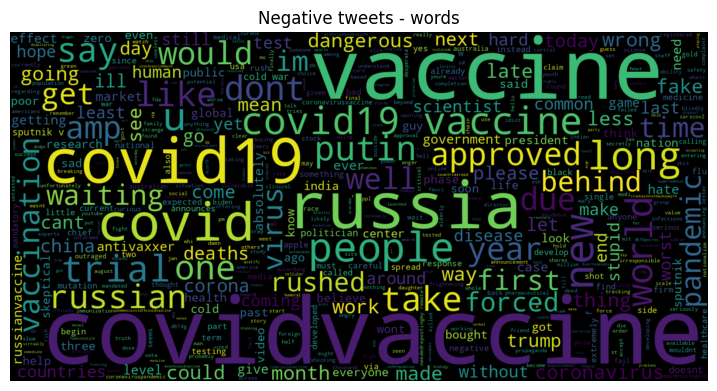

In [ ]:
text = ' '.join([word for word in negative_tweets['text']])
plt.figure(figsize=(9,9), facecolor='None')
wordcloud = WordCloud(stopwords=stop_words,max_words=500, width=1600, height=800).generate(text)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.title('Negative tweets - words')
plt.show()